In [1]:
%pip install tensorflow==2.17.0 tensorflow-gpu opencv-python mediapipe sklearn matplotlib
%pip install mediapipe

  Obtaining dependency information for tensorflow==2.17.0 from https://files.pythonhosted.org/packages/e0/cb/aab1d277dc1cb45166a1ac857bf535ef322437f4f6fbef55ad6dee31e00d/tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      Traceback (most recent call last):
        File "/private/var/folders/yt/jksd48rs50db8zmn87dv2ckm0000gp/T/pip-build-env-j5zkmbq9/overlay/lib/python3.12/site-packages/setuptools/_vendor/packaging/requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/private/var/folders/

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_face_mesh = mp.solutions.face_mesh


mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [5]:
print(dir(mp_holistic))


['FACEMESH_CONTOURS', 'FACEMESH_TESSELATION', 'HAND_CONNECTIONS', 'HandLandmark', 'Holistic', 'NamedTuple', 'POSE_CONNECTIONS', 'PoseLandmark', 'SolutionBase', '_BINARYPB_FILE_PATH', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_download_oss_pose_landmark_model', 'constant_side_packet_calculator_pb2', 'detections_to_rects_calculator_pb2', 'download_utils', 'gate_calculator_pb2', 'image_to_tensor_calculator_pb2', 'inference_calculator_pb2', 'landmark_projection_calculator_pb2', 'local_file_contents_calculator_pb2', 'non_max_suppression_calculator_pb2', 'np', 'rect_transformation_calculator_pb2', 'roi_tracking_calculator_pb2', 'split_vector_calculator_pb2', 'ssd_anchors_calculator_pb2', 'switch_container_pb2', 'tensors_to_classification_calculator_pb2', 'tensors_to_floats_calculator_pb2', 'tensors_to_landmarks_calculator_pb2']


In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Check if face_landmarks are present
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1)
        )

    # Check if pose_landmarks are present
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Check if hand_landmarks are present
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(250,44,250), thickness=2, circle_radius=2)
        )

    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(250,44,250), thickness=2, circle_radius=2)
        )


In [70]:
cap = cv2.VideoCapture(1)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        while cap.isOpened():

        # Read feed
            ret, frame = cap.read()

        # Make detections
            image, results = mediapipe_detection(frame, holistic)
        #print(results)

        # Draw landmarks
            draw_styled_landmarks(image, results)

        # Show to screen
            cv2.imshow('OpenCV Feed', image)

        # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()


I0000 00:00:1726539105.293137 11169570 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2 Pro
W0000 00:00:1726539105.403775 11343420 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539105.422327 11343419 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539105.424431 11343421 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539105.424639 11343419 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539105.425101 11343417 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling 

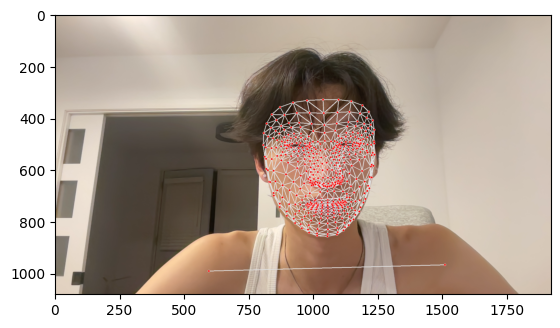

In [71]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
len(results.face_landmarks.landmark)

468

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [31]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [33]:
face = (
np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks
    else np.zeros(1404)
)

In [35]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [37]:
result_test = extract_keypoints(results)

In [38]:
result_test

array([ 0.46771869,  0.54818785, -1.00459111, ...,  0.        ,
        0.        ,  0.        ])

In [39]:
np.save('0', result_test)

In [40]:
np.load('0.npy')

array([ 0.46771869,  0.54818785, -1.00459111, ...,  0.        ,
        0.        ,  0.        ])

In [74]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30



In [83]:
for action in actions: 
    # Check if the action directory exists, if not, create it
    action_dir = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)

    # Find the max number of existing sequences in the directory
    #dirmax = np.max(np.array(os.listdir(action_dir)).astype(int)) if os.listdir(action_dir) else 0

    existing_dirs = [int(d) for d in os.listdir(action_dir) if d.isdigit()]
    dirmax = np.max(existing_dirs) + 1 if existing_dirs else 1
    
    end = dirmax+no_sequences

    # Create new directories for each sequence
    for sequence in range(dirmax,end):
        try: 
            os.makedirs(os.path.join(action_dir, str(dirmax + sequence)))
        except Exception as e:
            print(f"Error creating directory: {e}")


In [84]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                if not ret:
                    print("failed")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    cap.release()
                    cv2.destroyAllWindows()
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1726539556.857627 11169570 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2 Pro
W0000 00:00:1726539556.962372 11350133 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539556.985428 11350133 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539556.989072 11350131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539556.989199 11350139 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726539556.989219 11350132 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling 

FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data/hello/31/0.npy'

: 

4
